c:\Users\Acer\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Acer\Lib\site-packages\matplotlib\collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


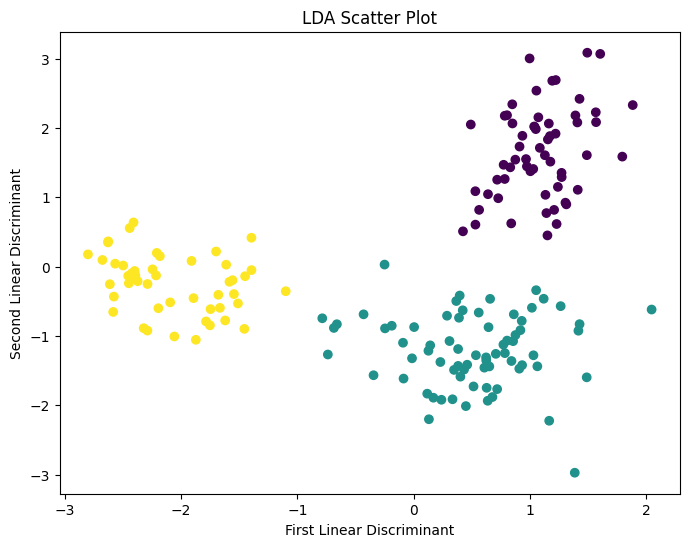

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the wine dataset
df = pd.read_csv('./Data/wine.csv')

# Assume the first column is the target and the rest are features
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Standardize the features to have mean=0 and variance=1
sc = StandardScaler()
X = sc.fit_transform(X)

# Calculate the mean vectors for each class
mean_vectors = []
for label in np.unique(y):
    mean_vectors.append(np.mean(X[y == label], axis=0))

# Calculate the within-class scatter matrix
n_features = X.shape[1]
S_W = np.zeros((n_features, n_features))
for label, mv in zip(np.unique(y), mean_vectors):
    class_scatter = np.cov(X[y == label].T)
    S_W += class_scatter

# Calculate the between-class scatter matrix
overall_mean = np.mean(X, axis=0)
S_B = np.zeros((n_features, n_features))
for i, mean_vec in enumerate(mean_vectors):
    n = X[y == i].shape[0]
    mean_vec = mean_vec.reshape(n_features, 1)
    overall_mean = overall_mean.reshape(n_features, 1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

# Calculate the eigenvalues and eigenvectors of (S_W^-1) * S_B
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Sort the eigenvalue-eigenvector pairs in decreasing order
eigenvalue_eigenvector_pairs = [(eigenvalue, eigenvector) for eigenvalue, eigenvector in zip(eigenvalues, eigenvectors.T)]
eigenvalue_eigenvector_pairs = sorted(eigenvalue_eigenvector_pairs, key=lambda x: x[0], reverse=True)

# Select the top k eigenvectors as transformation matrix
n_components = 2
W = np.array([eigenvalue_eigenvector_pairs[i][1] for i in range(n_components)])

# Project the data onto the new feature space
X_lda = X.dot(W.T)

# Create a scatter plot of the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y)
plt.xlabel('First Linear Discriminant')
plt.ylabel('Second Linear Discriminant')
plt.title('LDA Scatter Plot')
plt.show()
